<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/duration_frequency_disruptioncount_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


In [ ]:
#importing data from github. switched from google drive.
#url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv' # Changed url to raw data url
# using gamma coding data file
url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-gamma.csv'

df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,cid,uniquecid,...,Disruption labor produced.2,affect-goal: how did circumstance affect your goal? (answer only if,change- how did you change your goal in response to circumstance,Goal changes,notes.2,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)

In [ ]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    #or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal:_how_did_circumstance_affect_your_goal?_(answer_only_if,change-_how_did_you_change_your_goal_in_response_to_circumstance,goal_changes,notes.2,disruption_labor_aggregated,disruption_status,pid*gid*cid
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,No response,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,No response,Disruption,S01*goal1*circ1
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,Emotional,Disruption,S01*goal1*circ2
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,Physical,Disruption,S01*goal1*circ3
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,Emotional,Disruption,S01*goal2*circ1
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,Emotional,Disruption,S01*goal2*circ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,NaN,"Emotional, Financial, Logistical",Disruption,S149*goal1*circ2
685,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ3
686,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ4
687,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Paused,changed to paused from substituted activity- t...,"Physical, Emotional",Disruption,S149*goal2*circ1


## combining disruption categories and goal categories for analysis and reporting in manuscript


In [ ]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
temp_df = disruption_data

# combining categories and renaming labels to differentiate from goal categories
temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
    'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'

})

#grouping goals
temp_df['goal_categories'] = temp_df['goal_categories'].replace({
   'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Work/Career': 'Career/Education',
    'Education/Learning': 'Career/Education',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other',
    'Social connection':'Relationship',
    'Recreation': 'Finances',
    'Sobriety': 'Health'
})

disruption_data = temp_df
disruption_data

/tmp/ipython-input-2827347974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
/tmp/ipython-input-2827347974.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['goal_categories'] = temp_df['goal_categories'].replace({


,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal:_how_did_circumstance_affect_your_goal?_(answer_only_if,change-_how_did_you_change_your_goal_in_response_to_circumstance,goal_changes,notes.2,disruption_labor_aggregated,disruption_status,pid*gid*cid
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Finances,circ1,S01goal1circ1,Long term,NaN,...,No response,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,No response,Disruption,S01*goal1*circ1
1,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ2,S01goal1circ2,Long term,NaN,...,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,Emotional,Disruption,S01*goal1*circ2
2,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ3,S01goal1circ3,Long term,NaN,...,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,Physical,Disruption,S01*goal1*circ3
3,S01,goal2,S01goal2,NaN,Quell fears,Health,circ1,S01goal2circ1,Aspirational,r1,...,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,Emotional,Disruption,S01*goal2*circ1
4,S01,goal2,S01goal2,NaN,Quell fears,Health,circ2,S01goal2circ2,Aspirational,r2,...,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,Emotional,Disruption,S01*goal2*circ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ2,S149goal1circ2,Long term,NaN,...,Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,NaN,"Emotional, Financial, Logistical",Disruption,S149*goal1*circ2
685,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ3,S149goal1circ3,Long term,NaN,...,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ3
686,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ4,S149goal1circ4,Long term,NaN,...,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ4
687,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Health,circ1,S149goal2circ1,Medium term,NaN,...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Paused,changed to paused from substituted activity- t...,"Physical, Emotional",Disruption,S149*goal2*circ1


# All goals

## Acute vs Episodic vs Chronic

recategorizing based on how-long + frequency

['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

Acute: '<1 day' + 'monthly','every 6 months','yearly or less'
'<1 week' + 'every 6 months','yearly or less'

Episodic:
'<1 day' + 'weekly','every other week'
'<1 week' + 'monthly','every 6 months','yearly or less'
'<1 month'+ 'daily','weekly','every other week', 'every 6 months',

Chronic: '<1 day' + 'daily',
'<1 week' + 'weekly', 'every other week'
'<1 month' + 'monthly','every 6 months'
'<1 year', '>1 year'

In [ ]:
# Combining and Renaming the label names for clarity
disruption_data['how-long'] = disruption_data['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})
# create a new column 'intensity' based on how-long and frequency column values mapping 3 values acute, episodic, chronic
disruption_data['intensity'] = disruption_data.apply(
    lambda x: 'Acute' if (x['how-long'] in ['<1 day'] and x['frequency'] in ['monthly','every 6 months','yearly or less']) or (x['how-long'] in ['<1 week'] and x['frequency'] in ['every 6 months','yearly or less'])
    else 'Episodic' if (x['how-long'] in ['<1 week'] and x['frequency'] in ['monthly','every 6 months','yearly or less']) or (x['how-long'] in ['<1 day'] and x['frequency'] in ['weekly','every other week']) or (x['how-long'] in ['<1 month'] and x['frequency'] in ['daily','weekly','every other week', 'every 6 months'])
    else 'Chronic'
    , axis=1)
disruption_data

/tmp/ipython-input-2593947554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disruption_data['how-long'] = disruption_data['how-long'].replace({
/tmp/ipython-input-2593947554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disruption_data['intensity'] = disruption_data.apply(


,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal:_how_did_circumstance_affect_your_goal?_(answer_only_if,change-_how_did_you_change_your_goal_in_response_to_circumstance,goal_changes,notes.2,disruption_labor_aggregated,disruption_status,pid*gid*cid,intensity
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Finances,circ1,S01goal1circ1,Long term,NaN,...,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,No response,Disruption,S01*goal1*circ1,Chronic
1,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ2,S01goal1circ2,Long term,NaN,...,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,Emotional,Disruption,S01*goal1*circ2,Chronic
2,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ3,S01goal1circ3,Long term,NaN,...,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,Physical,Disruption,S01*goal1*circ3,Chronic
3,S01,goal2,S01goal2,NaN,Quell fears,Health,circ1,S01goal2circ1,Aspirational,r1,...,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,Emotional,Disruption,S01*goal2*circ1,Chronic
4,S01,goal2,S01goal2,NaN,Quell fears,Health,circ2,S01goal2circ2,Aspirational,r2,...,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,Emotional,Disruption,S01*goal2*circ2,Chronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ2,S149goal1circ2,Long term,NaN,...,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,NaN,"Emotional, Financial, Logistical",Disruption,S149*goal1*circ2,Episodic
685,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ3,S149goal1circ3,Long term,NaN,...,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ3,Acute
686,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ4,S149goal1circ4,Long term,NaN,...,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed quantity,NaN,Emotional,Disruption,S149*goal1*circ4,Chronic
687,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Health,circ1,S149goal2circ1,Medium term,NaN,...,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Paused,changed to paused from substituted activity- t...,"Physical, Emotional",Disruption,S149*goal2*circ1,Chronic


In [ ]:
dis_intensity= disruption_data[['pid*gid*cid','how-long','frequency','intensity','goal_categories']]
#filter out no response
dis_intensity = dis_intensity[dis_intensity['how-long'] != 'No response']
dis_intensity = dis_intensity[dis_intensity['frequency'] != 'No response']


dis_intensity_count = dis_intensity.groupby(['intensity']).size().reset_index(name='count_dis')

# calculate count as a 2 digit % of the total
dis_intensity_count['count_dis_perc'] = dis_intensity_count['count_dis'] / dis_intensity_count['count_dis'].sum() * 100
# round to 2 decumal
dis_intensity_count['count_dis_perc'] = dis_intensity_count['count_dis_perc'].round(2)

dis_intensity_count

# set order to how-long categories
xlabels_order = ['Acute','Episodic','Chronic']
dis_intensity_count['intensity'] = pd.Categorical(dis_intensity_count['intensity'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
dis_intensity_count = dis_intensity_count.sort_values(by=['intensity'])

dis_intensity_count

,intensity,count_dis,count_dis_perc
0,Acute,89,13.88
2,Episodic,182,28.39
1,Chronic,370,57.72


In [ ]:
dis_intensity_goal_count = dis_intensity.groupby(['goal_categories','intensity']).size().reset_index(name='count_dis')
dis_intensity_goal_count

# calculate count as a 2 digit % of the total
dis_intensity_goal_count['count_disruption_perc'] = dis_intensity_goal_count['count_dis'] / dis_intensity_goal_count['count_dis'].sum() * 100
# round to 2 decumal
dis_intensity_goal_count['count_disruption_perc'] = dis_intensity_goal_count['count_disruption_perc'].round(2)

dis_intensity_goal_count

# set order to how-long categories
xlabels_order = ['Acute','Episodic','Chronic']
dis_intensity_goal_count['intensity'] = pd.Categorical(dis_intensity_goal_count['intensity'], categories=xlabels_order, ordered=True)

# set order to goal_categories
xlabels_order = ['Health','Relationship', 'Finances', 'Career/Education','Other']
dis_intensity_goal_count['goal_categories'] = pd.Categorical(dis_intensity_goal_count['goal_categories'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
dis_intensity_goal_count = dis_intensity_goal_count.sort_values(by=['goal_categories','intensity'])


dis_intensity_goal_count

,goal_categories,intensity,count_dis,count_disruption_perc
6,Health,Acute,54,8.42
8,Health,Episodic,127,19.81
7,Health,Chronic,163,25.43
12,Relationship,Acute,8,1.25
14,Relationship,Episodic,11,1.72
13,Relationship,Chronic,33,5.15
3,Finances,Acute,12,1.87
5,Finances,Episodic,19,2.96
4,Finances,Chronic,119,18.56
0,Career/Education,Acute,14,2.18


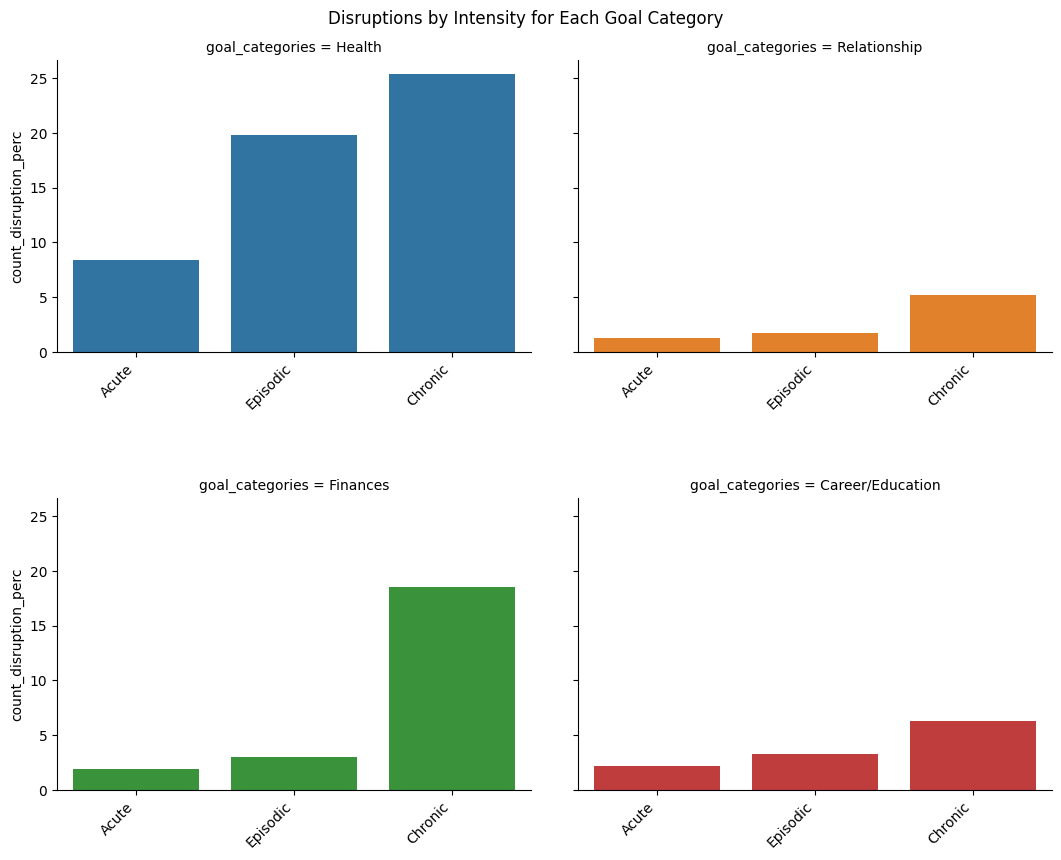

In [ ]:
# don't plot for other
dis_intensity_goal_count= dis_intensity_goal_count[dis_intensity_goal_count['goal_categories'] != 'Other']
#set order of plots
plot_order = ['Health','Relationship', 'Finances', 'Career/Education']
xlabels_order =  ['Acute','Episodic','Chronic']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='intensity', y='count_disruption_perc', hue='goal_categories', data=dis_intensity_goal_count, kind='bar', col='goal_categories', col_wrap=2,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Intensity for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## disruptions by duration and frequency

In [ ]:
dis_dur_freq= disruption_data[['pid*gid*cid','how-long','frequency']]
#filter out no response
dis_dur_freq = dis_dur_freq[dis_dur_freq['how-long'] != 'No response']
dis_dur_freq = dis_dur_freq[dis_dur_freq['frequency'] != 'No response']

# Combining and Renaming the label names for clarity
dis_dur_freq['how-long'] = dis_dur_freq['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

dis_dur_count = dis_dur_freq.groupby(['how-long']).size().reset_index(name='count_dur')

# calculate count as a 2 digit % of the total
dis_dur_count['count_duration_perc'] = dis_dur_count['count_dur'] / dis_dur_count['count_dur'].sum() * 100
# round to 2 decumal
dis_dur_count['count_duration_perc'] = dis_dur_count['count_duration_perc'].round(2)

dis_dur_count

# set order to how-long categories
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
dis_dur_count['how-long'] = pd.Categorical(dis_dur_count['how-long'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
dis_dur_count = dis_dur_count.sort_values(by=['how-long'])

dis_dur_count


In [ ]:
# prompt: Using dataframe dis_dur_count: using seaborn, plot count_duration_perc on a bar chart

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot using seaborn
sns.barplot(x='how-long', y='count_duration_perc', data=dis_dur_count)

# Add labels and title for better visualization
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Distribution of Duration Percentage')

# Show the plot
plt.show()


## % of sample population distribution




In [ ]:
#keep only pid, how-long and frequency
pid_dur_freq= disruption_data[['pid','how-long','frequency']]
#filter out no response
pid_dur_freq = pid_dur_freq[pid_dur_freq['how-long'] != 'No response']
pid_dur_freq = pid_dur_freq[pid_dur_freq['frequency'] != 'No response']

# Combining and Renaming the label names for clarity
pid_dur_freq['how-long'] = pid_dur_freq['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

# count of unique pids
pid_count_total = pid_dur_freq['pid'].nunique()

# keep only unique pid for each frequency value
pid_dur_freq = pid_dur_freq.drop_duplicates(subset=['pid','how-long'])

pid_dur_count = pid_dur_freq.groupby(['how-long']).size().reset_index(name='count_pid_dur')

#calculate count_pid_freq as a 2digit percentage of pid_count_total
pid_dur_count['count_pid_dur_perc'] = pid_dur_count['count_pid_dur'] / pid_count_total * 100

# round to 2 decimal
pid_dur_count['count_pid_dur_perc'] = pid_dur_count['count_pid_dur_perc'].round(2)

# get label and set order
xlabels_order = ['<1 day','<1 week','<1 month', '<1 year','>1 year']

pid_dur_count['how-long'] = pd.Categorical(pid_dur_count['how-long'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
pid_dur_count = pid_dur_count.sort_values(by=['how-long'])

pid_dur_count

In [ ]:
# prompt: Using dataframe dis_dur_count: using seaborn, plot count_duration_perc on a bar chart

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot using seaborn
sns.barplot(x='how-long', y='count_pid_dur_perc', data=pid_dur_count)

# Add labels and title for better visualization
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Number of Participants who reported a disruption of different duration as a Percentage')

#rotate xticks to 45 degree and ha=right
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### frequency

In [ ]:
dis_freq_count = dis_dur_freq.groupby(['frequency']).size().reset_index(name='count_freq')

# calculate count as a 2 digit % of the total
dis_freq_count['count_freq_perc'] = dis_freq_count['count_freq'] / dis_freq_count['count_freq'].sum() * 100
# round to 2 decumal
dis_freq_count['count_freq_perc'] = dis_freq_count['count_freq_perc'].round(2)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

dis_freq_count['frequency'] = pd.Categorical(dis_freq_count['frequency'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'freq' column
dis_freq_count = dis_freq_count.sort_values(by=['frequency'])

dis_freq_count

In [ ]:
# prompt: Using dataframe dis_dur_count: using seaborn, plot count_duration_perc on a bar chart

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot using seaborn
sns.barplot(x='frequency', y='count_freq_perc', data=dis_freq_count)

# Add labels and title for better visualization
plt.xlabel('Frequency')
plt.ylabel('Percentage')
plt.title('Number of Disruptions of different Frequency as a Percentage')

#rotate xticks to 45 degree and ha=right
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## % of sample population distribution

In [ ]:
#keep only pid, how-long and frequency
pid_dur_freq= disruption_data[['pid','how-long','frequency']]
#filter out no response
pid_dur_freq = pid_dur_freq[pid_dur_freq['how-long'] != 'No response']
pid_dur_freq = pid_dur_freq[pid_dur_freq['frequency'] != 'No response']

# Combining and Renaming the label names for clarity
pid_dur_freq['how-long'] = pid_dur_freq['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

# count of unique pids
pid_count_total = pid_dur_freq['pid'].nunique()

# keep only unique pid for each frequency value
pid_dur_freq = pid_dur_freq.drop_duplicates(subset=['pid','frequency'])

pid_freq_count = pid_dur_freq.groupby(['frequency']).size().reset_index(name='count_pid_freq')

#calculate count_pid_freq as a 2digit percentage of pid_count_total
pid_freq_count['count_pid_freq_perc'] = pid_freq_count['count_pid_freq'] / pid_count_total * 100

# round to 2 decimal
pid_freq_count['count_pid_freq_perc'] = pid_freq_count['count_pid_freq_perc'].round(2)

# get label and set order
xlabels_order = ['daily','weekly','every other week','monthly','every 6 months','yearly or less']

pid_freq_count['frequency'] = pd.Categorical(pid_freq_count['frequency'], categories=xlabels_order, ordered=True)

pid_freq_count.sort_values(by=['frequency'])

In [ ]:
# Create the bar plot using seaborn
sns.barplot(x='frequency', y='count_pid_freq_perc', data=pid_freq_count)

# Add labels and title for better visualization
plt.xlabel('Frequency')
plt.ylabel('PID Count')
plt.title('Number of Participants who reported a disruption of different Frequency as a Percentage')

#rotate xticks to 45 degree and ha=right
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# Duration and Frequency by Goal Category

In [ ]:
dis_dur_goal= disruption_data[['goal_categories','how-long']]
#filter out no response
dis_dur_goal = dis_dur_goal[dis_dur_goal['how-long'] != 'No response']

# Combining and Renaming the label names for clarity
dis_dur_goal['how-long'] = dis_dur_goal['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

dis_dur_goal_count = dis_dur_goal.groupby(['goal_categories','how-long']).size().reset_index(name='count_dis')
dis_dur_goal_count

# calculate count as a 2 digit % of the total
dis_dur_goal_count['count_disruption_perc'] = dis_dur_goal_count['count_dis'] / dis_dur_goal_count['count_dis'].sum() * 100
# round to 2 decumal
dis_dur_goal_count['count_disruption_perc'] = dis_dur_goal_count['count_disruption_perc'].round(2)

dis_dur_goal_count

# set order to how-long categories
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
dis_dur_goal_count['how-long'] = pd.Categorical(dis_dur_goal_count['how-long'], categories=xlabels_order, ordered=True)

# set order to goal_categories
xlabels_order = ['Health','Relationship', 'Finances', 'Career/Education','Other']
dis_dur_goal_count['goal_categories'] = pd.Categorical(dis_dur_goal_count['goal_categories'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
dis_dur_goal_count = dis_dur_goal_count.sort_values(by=['goal_categories','how-long'])

dis_dur_goal_count

### smal multiples

In [ ]:
# don't plot for other
dis_dur_goal_count= dis_dur_goal_count[dis_dur_goal_count['goal_categories'] != 'Other']
#set order of plots
plot_order = ['Health','Relationship', 'Finances', 'Career/Education']
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count_disruption_perc', hue='goal_categories', data=dis_dur_goal_count, kind='bar', col='goal_categories', col_wrap=2,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()


## frequency

In [ ]:
dis_freq_goal= disruption_data[['goal_categories','frequency']]
#filter out no response
dis_freq_goal = dis_freq_goal[dis_freq_goal['frequency'] != 'No response']

dis_freq_goal_count = dis_freq_goal.groupby(['goal_categories','frequency']).size().reset_index(name='count_dis')
dis_freq_goal_count

# calculate count as a 2 digit % of the total
dis_freq_goal_count['count_disruption_perc'] = dis_freq_goal_count['count_dis'] / dis_freq_goal_count['count_dis'].sum() * 100
# round to 2 decumal
dis_freq_goal_count['count_disruption_perc'] = dis_freq_goal_count['count_disruption_perc'].round(2)

dis_freq_goal_count

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']
dis_freq_goal_count['frequency'] = pd.Categorical(dis_freq_goal_count['frequency'], categories=xlabels_order, ordered=True)

# set order to goal_categories
xlabels_order = ['Health','Relationship', 'Finances', 'Career/Education','Other']
dis_freq_goal_count['goal_categories'] = pd.Categorical(dis_freq_goal_count['goal_categories'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
dis_freq_goal_count = dis_freq_goal_count.sort_values(by=['goal_categories','frequency'])

dis_freq_goal_count

In [ ]:
# don't plot for other
dis_freq_goal_count= dis_freq_goal_count[dis_freq_goal_count['goal_categories'] != 'Other']
#set order of plots
plot_order = ['Health','Relationship', 'Finances', 'Career/Education']
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count_disruption_perc', hue='goal_categories', data=dis_freq_goal_count, kind='bar', col='goal_categories', col_wrap=2,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

# Well-being goals only

In [ ]:
df_wellbeing_dur_freq = disruption_data[['pid','gid','pid*gid*cid','how-long','frequency','goal_categories', 'barrier_or_event', 'situation_that_occurred', 'disruption_status']]
# filter out disruption_status = Disruption
df_wellbeing_dur_freq = df_wellbeing_dur_freq[df_wellbeing_dur_freq['disruption_status'] == 'Disruption']
#filter out goal_categories == 'Finances', 'Career/Education'
df_wellbeing_dur_freq = df_wellbeing_dur_freq[~df_wellbeing_dur_freq['goal_categories'].isin(['Finances', 'Career/Education'])]
df_wellbeing_dur_freq

## duration event-disruptions count

In [ ]:
dis_wellbeing_dur_freq= df_wellbeing_dur_freq[['pid*gid*cid','how-long','frequency','barrier_or_event']]
#filter out no response
dis_wellbeing_dur_freq = dis_wellbeing_dur_freq[dis_wellbeing_dur_freq['how-long'] != 'No response']
dis_wellbeing_dur_freq = dis_wellbeing_dur_freq[dis_wellbeing_dur_freq['frequency'] != 'No response']

# #filter out barriers
# dis_wellbeing_dur_freq = dis_wellbeing_dur_freq[dis_wellbeing_dur_freq['barrier_or_event'] != 'barrier']

# Combining and Renaming the label names for clarity
dis_wellbeing_dur_freq['how-long'] = dis_wellbeing_dur_freq['how-long'].replace({
    'an hour or less': '<1 day',
    'more than an hour to half a day': '<1 day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

wellbeing_dis_dur_count = dis_wellbeing_dur_freq.groupby(['how-long']).size().reset_index(name='count_dur')

# calculate count as a 2 digit % of the total
wellbeing_dis_dur_count['count_duration_perc'] = wellbeing_dis_dur_count['count_dur'] / wellbeing_dis_dur_count['count_dur'].sum() * 100
# round to 2 decumal
wellbeing_dis_dur_count['count_duration_perc'] = wellbeing_dis_dur_count['count_duration_perc'].round(2)

# set order to how-long categories
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
wellbeing_dis_dur_count['how-long'] = pd.Categorical(wellbeing_dis_dur_count['how-long'], categories=xlabels_order, ordered=True)

# Sort the DataFrame based on the 'how-long' column
wellbeing_dis_dur_count = wellbeing_dis_dur_count.sort_values(by=['how-long'])

wellbeing_dis_dur_count

# slicing and dicing-- ignore

## were disrupted for a short duration

In [ ]:
# prompt: filter disruption_data where goal_categories is Health and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_health_short = disruption_data[
    (disruption_data['goal_categories'] == 'Health') &
    (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']))
]
dis_data_health_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

In [ ]:
# prompt: plot count of rows grouped by situation_that_occurred and how_long values ['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']

# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_health_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## health goals disrupted more than a week

In [ ]:
# prompt: filter disruption_data where goal_categories is Health and how-long is week

dis_data_health_long = disruption_data[
    (disruption_data['goal_categories'] == 'Health') &
    (disruption_data['how-long'].isin(['multiple weeks to a month','multiple months to a year','longer than a year']))
]
dis_data_health_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]


In [ ]:
# prompt: plot count of rows grouped by situation_that_occurred and how_long values ['an hour or less', 'more than half a day to a day', 'more than an hour to half a day']

# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_health_long.groupby(['situation_that_occurred','how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')


# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## financial goals

In [ ]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_fin_short = disruption_data[
    (disruption_data['goal_categories'] == 'Finances') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week', 'multiple weeks to a month']))]

dis_data_fin_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]




In [ ]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_fin_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [ ]:
# filter disruption_data where goal_categories is Financial and how-long is

dis_data_fin_long = disruption_data[
    (disruption_data['goal_categories'] == 'Finances') & (disruption_data['how-long'].isin(['multiple months to a year','longer than a year']))]

dis_data_fin_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]


In [ ]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_fin_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## work and education goals

In [ ]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_short = disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day']))]

dis_data_work_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]




In [ ]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [ ]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_medium = disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['multiple days to a week', 'multiple weeks to a month']))]

dis_data_work_medium[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

In [ ]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_medium.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [ ]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_long= disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['multiple months to a year', 'longer than a year']))]

dis_data_work_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

In [ ]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## relationship goals

In [ ]:
dis_data_rel_short= disruption_data[
    (disruption_data['goal_categories'] == 'Social connection') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']))]

dis_data_rel_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]



In [ ]:
grouped_data = dis_data_rel_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [ ]:
dis_data_rel_long= disruption_data[
    (disruption_data['goal_categories'] == 'Social connection') & (disruption_data['how-long'].isin(['multiple weeks to a month','multiple months to a year','longer than a year' ]))]

dis_data_rel_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

In [ ]:
grouped_data = dis_data_rel_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## Frequency- health goals

In [ ]:
# prompt: filter disruption_data where goal_categories is Health and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_health_freq_often = disruption_data[
    (disruption_data['goal_categories'] == 'Health')

    &(disruption_data['frequency'].isin(['daily', 'weekly']))
]
dis_data_health_freq_often[['goal-statement','goal_categories','circumstance','situation_that_occurred','frequency']]